# Titanic Dataset
--------------------------------------------------Business Understanding-------------------------------------------------------

The titanic and titanic2 data frames describe the survival status of individual passengers on the Titanic. The titanic data frame does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.

The variables on our extracted dataset are pclass, survived, name, age, embarked, home.dest, room, ticket, boat, and sex. pclass refers to passenger class (1st, 2nd, 3rd), and is a proxy for socio-economic class. Age is in years, and some infants had fractional values.
 - PassengerId ID
 - Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
 - survival: Survival (0 = No; 1 = Yes)
 - name: Name
 - sex: Sex
 - sibsp: Number of Siblings/Spouses Aboard
 - parch: Number of Parents/Children Aboard
 - ticket: Ticket Number
 - fare: Passenger Fare (British pound)
 - cabin: Cabin
 - embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Data understanding, Análise exploratória, Limpeza e Preparação de Dados
Nesta sessão, o dataset será importado e passará por diversas análises e transformações.
O objetivo é correlacionar os dados com foco na sobrevivência dos passageiros. Portanto, as decisões aqui tomadas serão em prol de construir um dataset com informações relevantes para essa análise.

- Descrição dos dados: 
    - Como observado anteriormente, os dados do dataset são provenientes de diferentes fontes;
    - Não há colunas duplicadas;
    - Não há colunas com uma variável constante;
    - Composto por 12 Colunas e 892 Linhas;
    - O PassengerId é apenas a enumeração em ordem crescente dos passageiros e não agrega nenhuma informação útil;
    - O nome do passageiro provavelmente não apresenta nenhuma informação útil para com a sobrevivência, talvez o sobrenome ou se eram crianças seja útil;

- Mensurar Qualidade dos Dados:
    - Completude
        - Densidade
        - Cobertura
    - Consistência
        - Integridade Inter-entidade
        - Integridade Intra-entidade
    - Acurária
        - Corretude Sintática
    - Unicidade
        - Não Duplicação
        
- Análise Exploratória:
    - Básica
        - Head
        - Shape
        - Info
        - Describe
    - Verificação de Outliers
    - Análise Bi-variada
        - Corr. entre variáveis numéricas
        - Corr. entre variáveis numéricas e categóricas
        - Corr. entre duas variáveis categóricas

### Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mticker
from scipy import stats
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

from sklearn.ensemble import GradientBoostingClassifier

plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55
a = 0.65

<Figure size 28800x9600 with 0 Axes>

### Importando database

In [2]:
df = pd.read_csv("titanic-data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dimensão

In [3]:
df.shape

(891, 12)

### Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Describe

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Histogramas

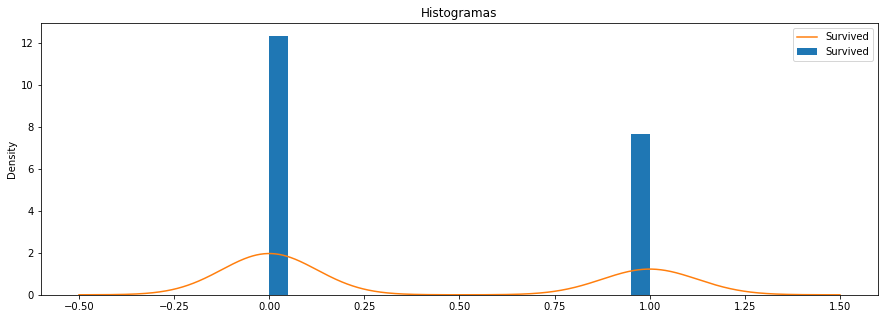

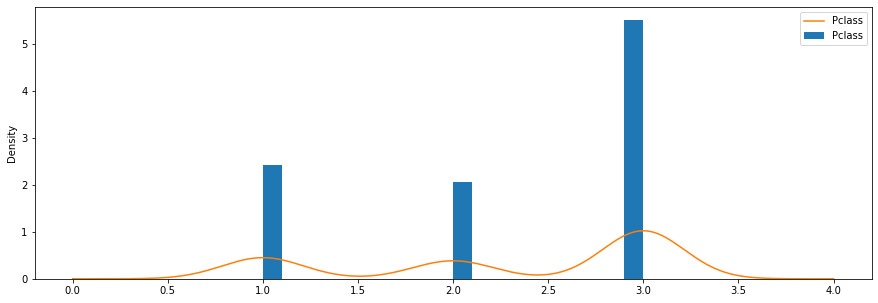

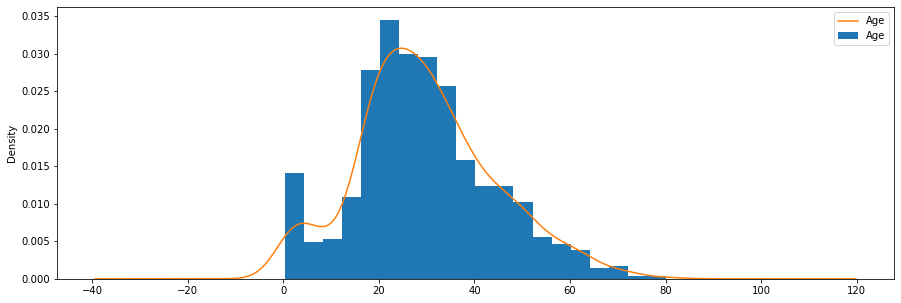

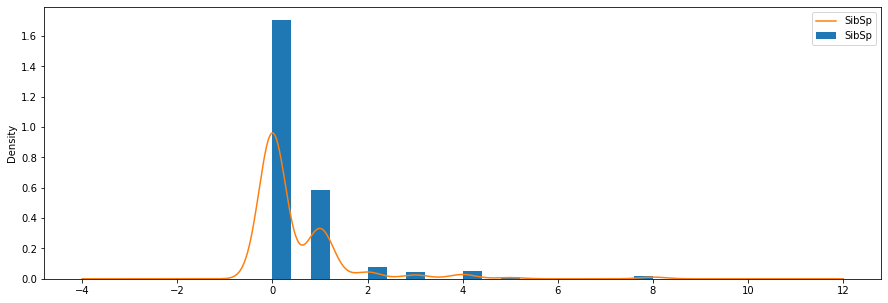

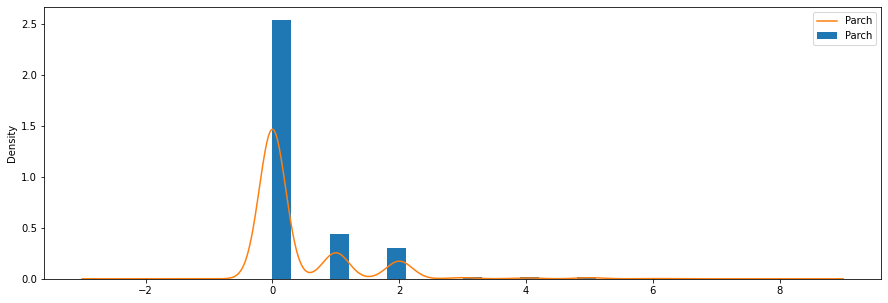

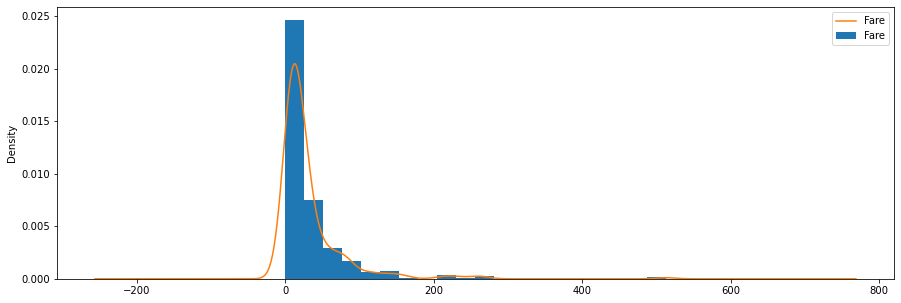

In [6]:
plt.title("Histogramas")
for column in df:
    if(column == 'Column'):
        pass
    elif(column == 'PassengerId'):
        pass
    elif(column == 'Ticket'):
        pass
    elif(column == 'Sex'):
        pass
    elif(column == 'Cabin'):
        pass
    elif(column == 'Name'):
        pass
    elif(column == 'Embarked'):
        pass
    else:
        df[column].plot(kind = 'hist', density = True, bins = 20)
        df[column].plot(kind = "kde")
        plt.legend()
        plt.show()

### Unicidade

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [8]:
print(f"Total de valores únicos :")
for column in df:
    print(f"")
    print(f"{column} : {df[column].unique().shape[0]}")
    if (column == "PassengerId"):
        pass
    elif (column == "Name"):
        pass
    elif (column == "Age"):
        pass
    elif (column == "Ticket"):
        pass
    elif (column == "Fare"):
        pass
    elif (column == "Cabin"):
        pass
    else:
        print(f"Valores:{df[column].unique()}")     

Total de valores únicos :

PassengerId : 891

Survived : 2
Valores:[0 1]

Pclass : 3
Valores:[3 1 2]

Name : 891

Sex : 2
Valores:['male' 'female']

Age : 89

SibSp : 7
Valores:[1 0 3 4 2 5 8]

Parch : 7
Valores:[0 1 2 5 3 4 6]

Ticket : 681

Fare : 248

Cabin : 148

Embarked : 4
Valores:['S' 'C' 'Q' nan]


### Completude

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Densidade

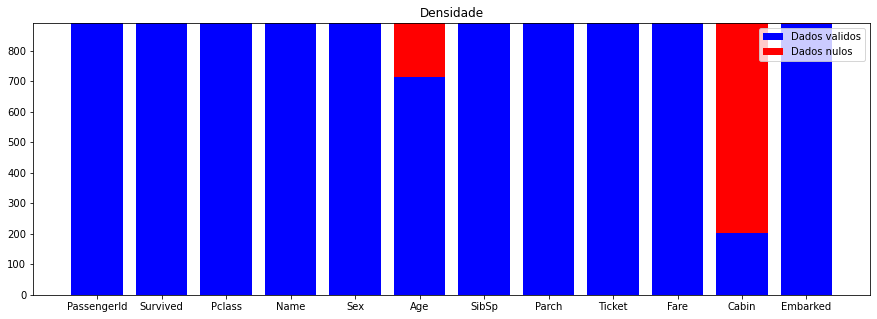

In [10]:
tam = len(df)
dados_validos = []
dados_nulos = []
for column in df:
    dados_nulos.append(df[column].isna().sum())
    dados_validos.append(tam - df[column].isna().sum())
plt.bar(df.columns.tolist(), dados_validos, color='b',label = 'Dados validos') 
plt.bar(df.columns.tolist(), dados_nulos, bottom=dados_validos, color='r', label = 'Dados nulos')
plt.title("Densidade")
plt.legend()
plt.show()

In [11]:
tam = len(df)
for column in df:
    nulos = df[column].isna().sum()
    x = 1 - nulos/tam   
    print("Dados validos de", column, ":", x*100, "%" )

Dados validos de PassengerId : 100.0 %
Dados validos de Survived : 100.0 %
Dados validos de Pclass : 100.0 %
Dados validos de Name : 100.0 %
Dados validos de Sex : 100.0 %
Dados validos de Age : 80.13468013468014 %
Dados validos de SibSp : 100.0 %
Dados validos de Parch : 100.0 %
Dados validos de Ticket : 100.0 %
Dados validos de Fare : 100.0 %
Dados validos de Cabin : 22.895622895622893 %
Dados validos de Embarked : 99.77553310886644 %


#### Cobertura

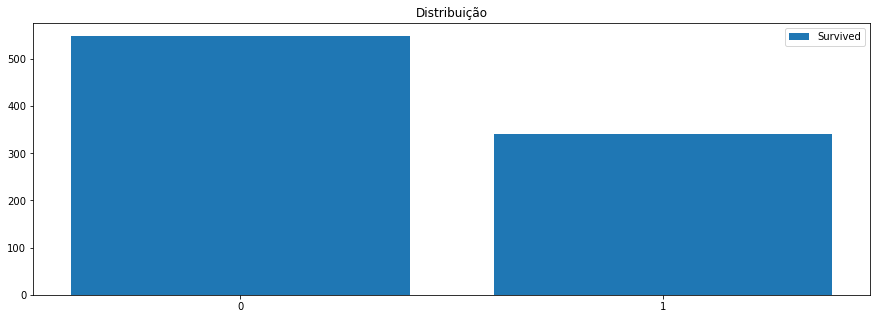

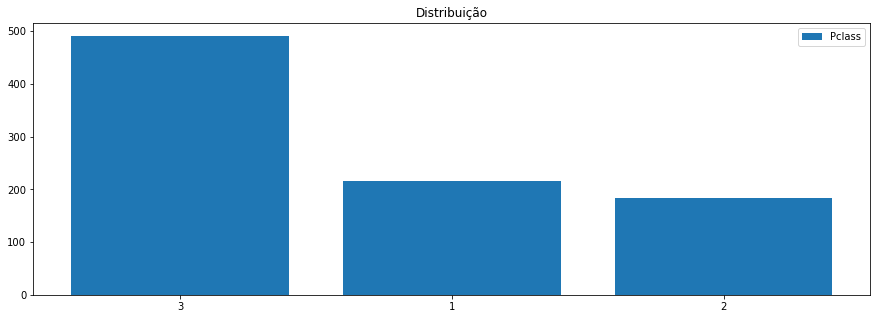

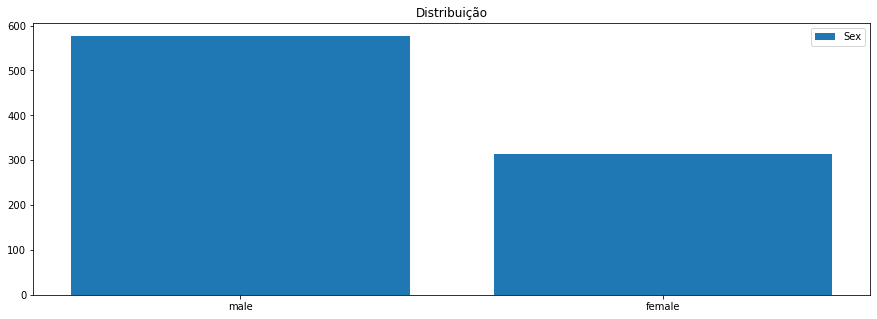

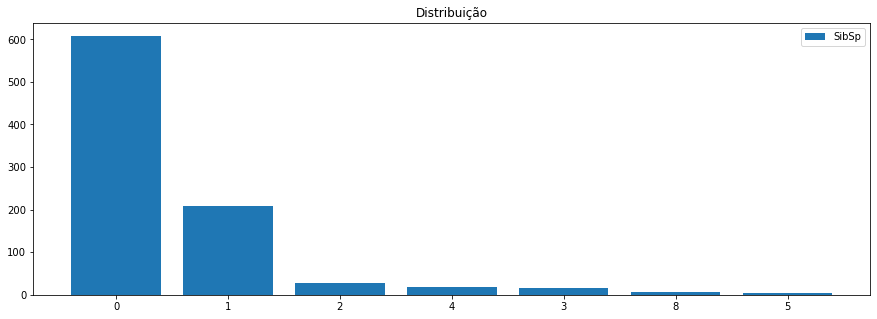

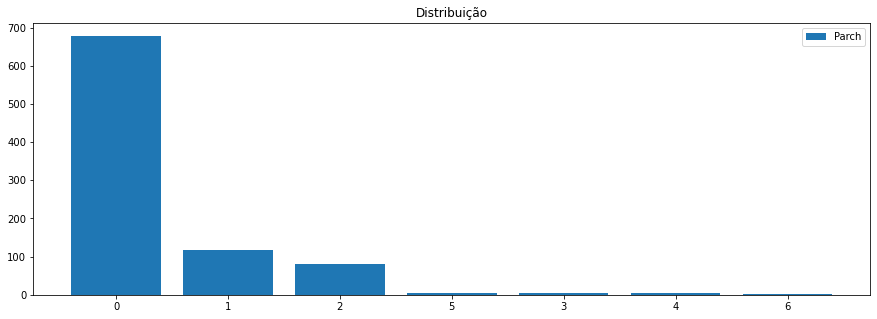

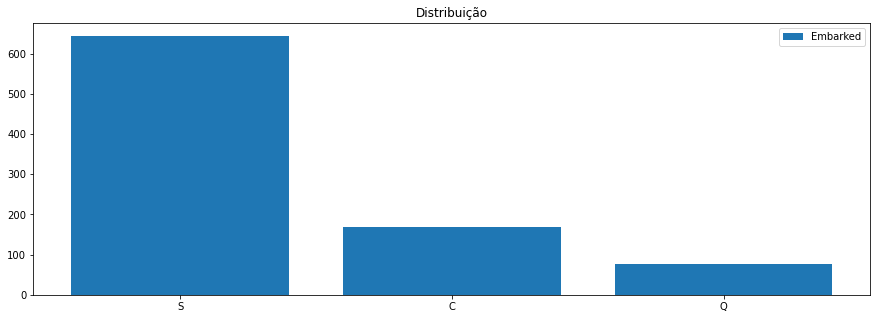

In [12]:
for column in df:
    if(column == 'Column'):
        pass
    elif(column == 'PassengerId'):
        pass
    elif(column == 'Ticket'):
        pass
    elif(column == 'Months'):
        pass
    elif(column == 'Cabin'):
        pass
    elif(column == 'Age'):
        pass
    elif(column == 'Fare'):
        pass
    elif(column == 'Name'):
        pass
    else:
        item_counts = df[column].value_counts()
        item_counts_dict = dict(item_counts)
        plt.bar(range(len(item_counts_dict)), list(item_counts_dict.values()), align='center', label = column)
        plt.xticks(range(len(item_counts_dict)), list(item_counts_dict.keys()))
        plt.title("Distribuição")
        plt.legend()
        plt.show()

### Limpeza e Transformação
- remoção do PassengerId
- remoção da informação Cabin que possuía baixa completude (abaixo de 70%)
- transformação da feature categórica: Sex, em feature numérica: Gender (0|1)

In [13]:
df_1 = pd.get_dummies(df["Sex"])
df_2 = pd.concat((df_1, df), axis=1)
df_2 = df_2.drop(["Sex","PassengerId","Cabin", "male"], axis=1)
df_3 = df_2.rename(columns={"female": "Gender"})
df_3.head()

,Gender,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C
2,1,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S
4,0,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S


### Lidando com Missing Data
- adicionando a idade para valores faltantes por meio de interpolação do tipo PAD (utilizando valores existentes)
- adicionando S nos Embarked Faltantes, pois este ponto de embarque é o mais recorrente

In [14]:
df_3["Embarked"].fillna("S", inplace =True)
df_3.interpolate(method ='pad', inplace=True)
df_3.info()
df_3.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    891 non-null    uint8  
 1   Survived  891 non-null    int64  
 2   Pclass    891 non-null    int64  
 3   Name      891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3), uint8(1)
memory usage: 63.6+ KB


,Gender,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C
2,1,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S
4,0,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S
5,0,0,3,"Moran, Mr. James",35.0,0,0,330877,8.4583,Q
6,0,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,S
7,0,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,S
8,1,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,S
9,1,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,C


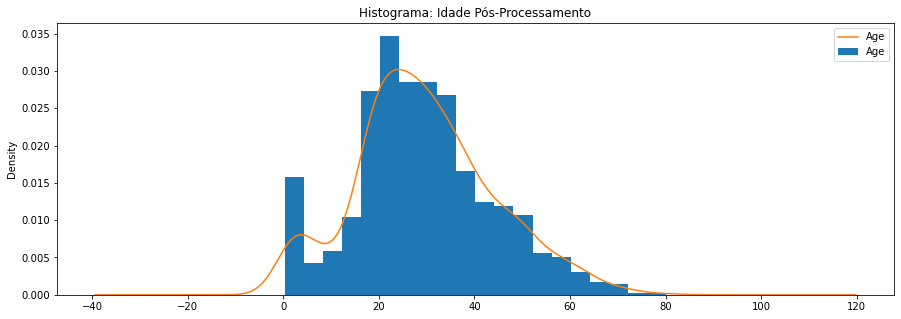

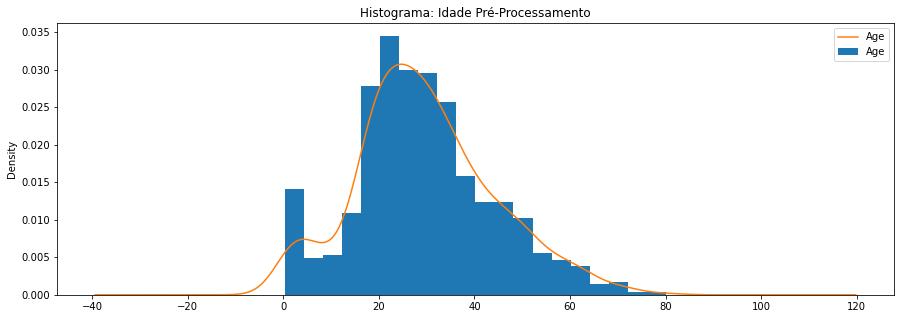

In [15]:
plt.title("Histograma: Idade Pós-Processamento")
df_3["Age"].plot(kind = 'hist', density = True, bins = 20)
df_3["Age"].plot(kind = "kde")
plt.legend()
plt.show()
plt.title("Histograma: Idade Pré-Processamento")
df["Age"].plot(kind = 'hist', density = True, bins = 20)
df["Age"].plot(kind = "kde")
plt.legend()
plt.show()

### Engenharia de Dados
- separação da idade para adição da coluna meses
- diferenciação entre criança e adulto, utilizando relação entre o Título presente no nome (Miss e Master) e a Idade

In [16]:
months = []
for index, row in df_3.iterrows():
    months.append(row['Age']*12)
                  
df_3['Months'] = months

adults = []
for index, row in df_3.iterrows():
    name = str(row['Name'])
    if(("Miss." in name) & (row['Age'] < 18)):
        adults.append(0)
    elif(("Master" in name) & (row['Age'] < 18)):
        adults.append(0)
    else:
        adults.append(1)
                  
df_3['Adult'] = adults
df_3.info()
df_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    891 non-null    uint8  
 1   Survived  891 non-null    int64  
 2   Pclass    891 non-null    int64  
 3   Name      891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Months    891 non-null    float64
 11  Adult     891 non-null    int64  
dtypes: float64(3), int64(5), object(3), uint8(1)
memory usage: 77.6+ KB


,Gender,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Months,Adult
0,0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,264.0,1
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,456.0,1
2,1,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,312.0,1
3,1,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,420.0,1
4,0,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,420.0,1


#### Percebe-se que os métodos para preencher Missing  Values foram efetivos, pois, as estatísticas que envolvem a Idade foram minimamente alteradas

In [17]:
df_3.describe()

,Gender,Survived,Pclass,Age,SibSp,Parch,Fare,Months,Adult
count,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.352413,0.383838,2.308642,29.58156,0.523008,0.381594,32.204208,354.978721,0.897868
std,0.477990,0.486592,0.836071,14.55459,1.102743,0.806057,49.693429,174.655078,0.302992
min,0.000000,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000,5.040000,0.000000
25%,0.000000,0.000000,2.000000,20.00000,0.000000,0.000000,7.910400,240.000000,1.000000
50%,0.000000,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200,336.000000,1.000000
75%,1.000000,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000,456.000000,1.000000
max,1.000000,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200,960.000000,1.000000


#### Remoção da coluna Idade, pois é uma informação "duplicada" com Meses

In [18]:
df_3 = df_3.drop("Age", axis=1)

Text(0.5, 1.0, 'Correlação entre Variáveis Numéricas')

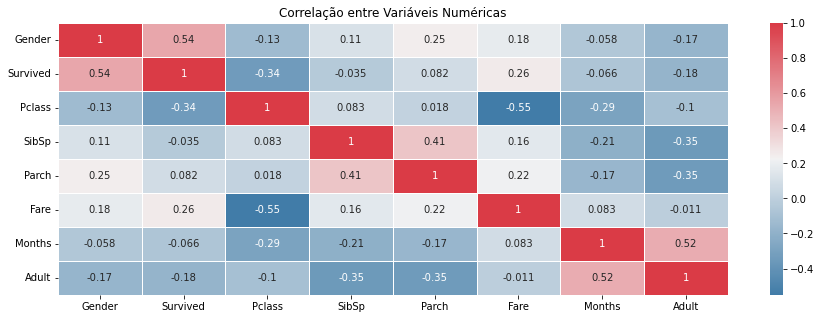

In [19]:
corr = df_3.corr()

cmap = sns.diverging_palette(600, 10, as_cmap = True)
sns.heatmap(corr, cmap=cmap, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidth=.5)
plt.title("Correlação entre Variáveis Numéricas")

Text(0.5, 1.0, 'Sobreviventes por Idade,  (1 = Sobreviveu)')

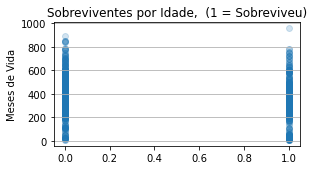

In [20]:
plt.subplot2grid((2,3),(0,1))
plt.scatter(df_3.Survived, df_3.Months, alpha=alpha_scatterplot)
plt.ylabel("Meses de Vida")                      
plt.grid(b=True, which='major', axis='y')  
plt.title("Sobreviventes por Idade,  (1 = Sobreviveu)")

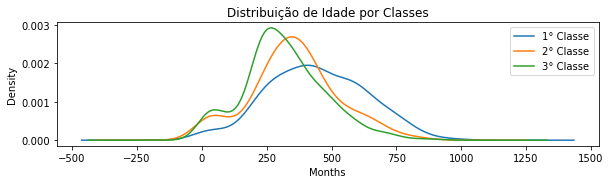

In [21]:
plt.subplot2grid((2,3),(1,0), colspan=2)
df_3.Months[df.Pclass == 1].plot(kind='kde')    
df_3.Months[df.Pclass == 2].plot(kind='kde')
df_3.Months[df.Pclass == 3].plot(kind='kde')

plt.xlabel("Months")    
plt.title("Distribuição de Idade por Classes")
plt.legend(('1° Classe', '2° Classe','3° Classe'),loc='best') 

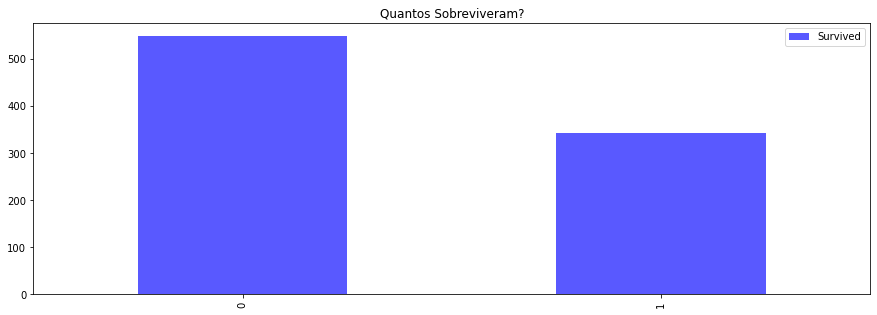

In [22]:
ax1 = fig.add_subplot(341)
df_3.Survived.value_counts().plot(kind='bar', color="blue", alpha=a)
ax1.set_xlim(-1, len(df_3.Survived.value_counts()))
plt.title("Quantos Sobreviveram?"); plt.legend(loc='best')

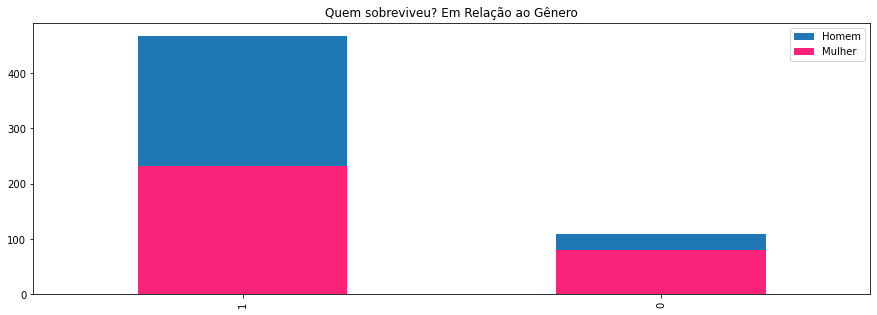

In [23]:
ax2 = fig.add_subplot(345)
df_3.Survived[df_3.Gender == 0].value_counts().plot(kind='bar',label='Homem')
df_3.Survived[df_3.Gender == 1].value_counts().plot(kind='bar', color='#FA2379',label='Mulher')
ax2.set_xlim(-1, 2)
plt.title("Quem sobreviveu? Em Relação ao Gênero"); plt.legend(loc='best')


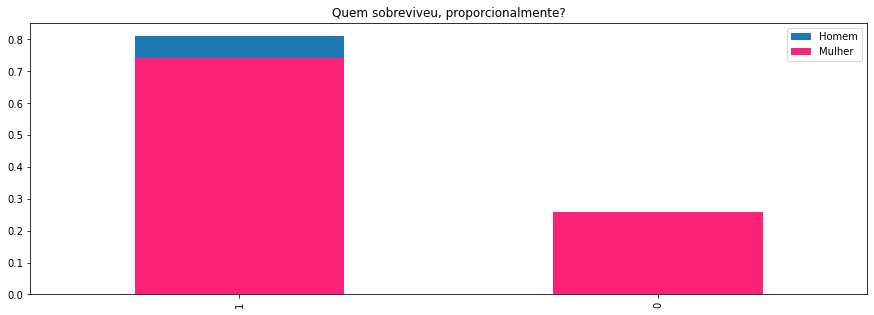

In [24]:
ax3 = fig.add_subplot(346)
(df_3.Survived[df_3.Gender == 0].value_counts()/float(df_3.Gender[df_3.Gender == 0].size)).plot(kind='bar',label='Homem')
(df_3.Survived[df_3.Gender == 1].value_counts()/float(df_3.Gender[df_3.Gender == 1].size)).plot(kind='bar', color='#FA2379',label='Mulher')
ax3.set_xlim(-1,2)
plt.title("Quem sobreviveu, proporcionalmente?"); plt.legend(loc='best')

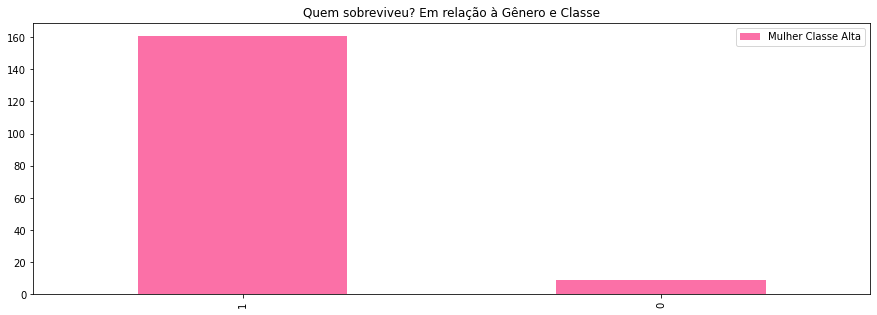

In [25]:
ax4 = fig.add_subplot(349)
female_highclass = df_3.Survived[df_3.Gender == 1][df_3.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='Mulher Classe Alta', color='#FA2479', alpha=a)
ax4.set_xticks([1, 2])
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Quem sobreviveu? Em relação à Gênero e Classe"); plt.legend(loc='best')

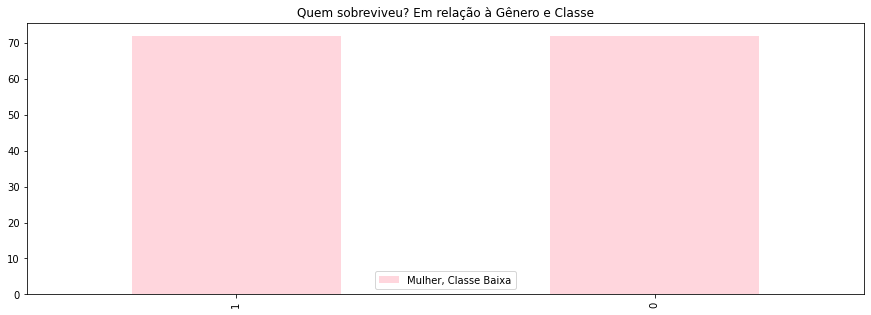

In [26]:
ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = df_3.Survived[df_3.Gender == 1][df_3.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='Mulher, Classe Baixa', color='pink', alpha=a)
ax5.set_xticks([1, 2])
ax5.set_xticklabels(["Survived", "Died"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.title("Quem sobreviveu? Em relação à Gênero e Classe"); plt.legend(loc='best')

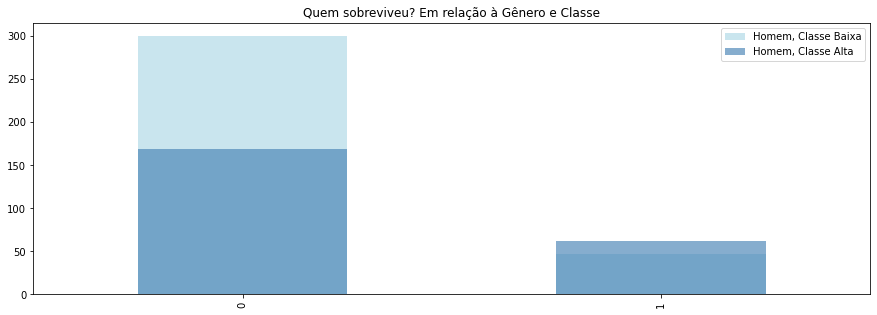

In [27]:
ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = df_3.Survived[df_3.Gender == 0][df_3.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='Homem, Classe Baixa',color='lightblue', alpha=a)
ax6.set_xticks([1, 2])
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = df_3.Survived[df_3.Gender == 0][df_3.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='Homem, Classe Alta', alpha=a, color='steelblue')
ax7.set_xticks([1, 2])
ax7.set_xticklabels(["Died","Survived"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')
plt.title("Quem sobreviveu? Em relação à Gênero e Classe"); plt.legend(loc='best')

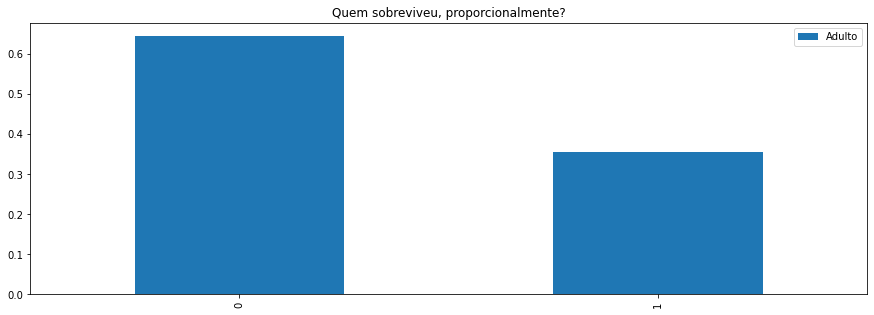

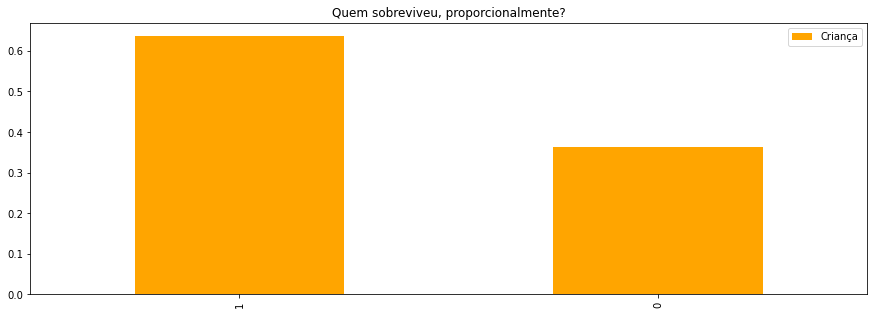

In [28]:
ax8 = fig.add_subplot(346)
(df_3.Survived[df_3.Adult == 1].value_counts()/float(df_3.Adult[df_3.Adult == 1].size)).plot(kind='bar', label='Adulto')
ax8.set_xlim(-1,2)
plt.title("Quem sobreviveu, proporcionalmente?"); plt.legend(loc='best')
plt.show()

(df_3.Survived[df_3.Adult == 0].value_counts()/float(df_3.Adult[df_3.Adult == 0].size)).plot(kind='bar', color='orange',label='Criança')
plt.title("Quem sobreviveu, proporcionalmente?"); plt.legend(loc='best')
plt.show()

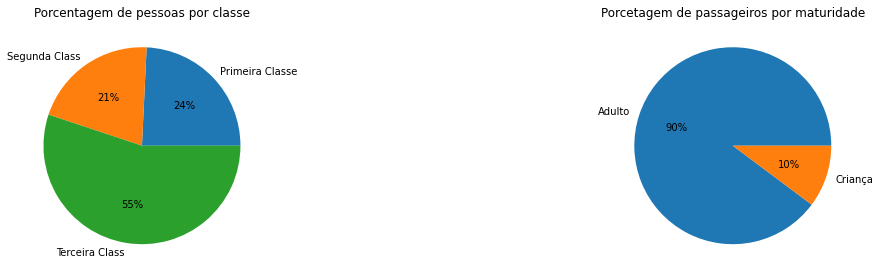

In [29]:
data = [df_3['Pclass'].value_counts()[1], df_3['Pclass'].value_counts()[2], df_3['Pclass'].value_counts()[3]]
labels = ['Primeira Classe', 'Segunda Class', 'Terceira Class']
colors = sns.color_palette()[0:3]
ax10 = plt.subplot2grid((1,3),(0,0))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Porcentagem de pessoas por classe')

data = [df_3['Adult'].value_counts()[1], df_3['Adult'].value_counts()[0]]
labels = ['Adulto', 'Criança']
colors = sns.color_palette()[0:3]
ax11 = plt.subplot2grid((1,3),(0,2))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Porcetagem de passageiros por maturidade')
plt.show()

## Modelo Implementado: Gradient Boosting
Parâmetros modificados para atingir melhor resultado

In [30]:
y_train = df_3["Survived"]
df_4 = df_3.drop(['Survived', 'Name', 'Ticket', 'Embarked'],axis=1)

X_train = df_4.values[0:891]
X_test = df_4.values[0:891]

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

test_size = 0.30 
seed = 12

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size, random_state=seed)
lr_list = [0.05, 0.075, 0.1, 0.25, 0.3, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=35, learning_rate=learning_rate, max_features=2, max_depth=3, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Taxa de Aprendizagem: ", learning_rate)
    print("Acurácia (Treinamento): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Acurácia (Validação): {0:.3f}\n".format(gb_clf.score(X_val, y_val)))

Taxa de Aprendizagem:  0.05
Acurácia (Treinamento): 0.846
Acurácia (Validação): 0.776

Taxa de Aprendizagem:  0.075
Acurácia (Treinamento): 0.870
Acurácia (Validação): 0.795

Taxa de Aprendizagem:  0.1
Acurácia (Treinamento): 0.876
Acurácia (Validação): 0.795

Taxa de Aprendizagem:  0.25
Acurácia (Treinamento): 0.888
Acurácia (Validação): 0.802

Taxa de Aprendizagem:  0.3
Acurácia (Treinamento): 0.899
Acurácia (Validação): 0.817

Taxa de Aprendizagem:  0.5
Acurácia (Treinamento): 0.909
Acurácia (Validação): 0.772

Taxa de Aprendizagem:  0.75
Acurácia (Treinamento): 0.926
Acurácia (Validação): 0.784

Taxa de Aprendizagem:  1
Acurácia (Treinamento): 0.936
Acurácia (Validação): 0.757



In [31]:
gb_clf2 = GradientBoostingClassifier(n_estimators=35, learning_rate=0.3, max_features=2, max_depth=3, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Matriz de Confusão:")
print(confusion_matrix(y_val, predictions))

print("Relatório de Classificação")
print(classification_report(y_val, predictions))

Matriz de Confusão:
[[145  16]
 [ 33  74]]
Relatório de Classificação
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       161
           1       0.82      0.69      0.75       107

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.82      0.81       268



# Precisão de Classificação: 82%